In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def backtracking(f, grad_f, x):
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

In [17]:
def GD_WT(f, grad_f, x0, kmax, tolf, tolx, alpha):
    xsol=x0
    x=[x0]
    f_val=[f(xsol)]
    grad=[grad_f(xsol)]
    err=[np.linalg.norm(grad_f(xsol))]
    i=0
    cond = True
    while i < kmax and cond :
        xsol=(xsol-alpha*grad_f(xsol))
        x.append(xsol)
        f_val.append(f(xsol))
        grad.append(grad_f(xsol))
        err.append(np.linalg.norm(grad_f(xsol)))
        i+=1
        cond =  np.linalg.norm(grad_f(xsol)) > tolf*np.linalg.norm(grad_f(x0)) and np.linalg.norm(x[i]-x[i-1]) > tolx
    return x,i,f_val,grad,err

In [18]:
def GD(f, grad_f, x0, kmax, tolf, tolx):
    xsol=x0
    x=[x0]
    f_val=[f(xsol)]
    grad=[grad_f(xsol)]
    err=[np.linalg.norm(grad_f(xsol))]
    i=0
    cond = True
    while i < kmax and cond :
        alpha = backtracking(f, grad_f, xsol)
        xsol=(xsol-alpha*grad_f(xsol))
        x.append(xsol)
        f_val.append(f(xsol))
        grad.append(grad_f(xsol))
        err.append(np.linalg.norm(grad_f(xsol)))
        i+=1
        cond =  np.linalg.norm(grad_f(xsol)) > tolf*np.linalg.norm(grad_f(x0)) and np.linalg.norm(x[i]-x[i-1]) > tolx
    return x,i,f_val,grad,err

In [19]:
def f(x):
    v = np.linspace(0,1,n)
    A = np.vander(v, increasing = True)
    x_true = np.ones(n)
    b = A @ np.ones(n)
    return (np.linalg.norm(A @ x - b,2)**2)/2
def grad_f(x):
    v = np.linspace(0,1,n)
    A = np.vander(v, increasing = True)
    b = A @ np.ones(n)
    return A @ x - b

### GD with backtracking method 

In [20]:
n=10
x0 = np.zeros(n)
x_comp, i_comp,f_val_comp, grad_comp, err_comp = GD(f,grad_f,x0,10000, 1e-4, 1e-4)
print("x=",x_comp[-1])
print("K=",i_comp)
print("f(x)=",f_val_comp[-1])
print("grad_f(x)=",grad_comp[-1])
print("Error=",err_comp[-1])

x= [0.99996536 1.03566614 1.05461425 1.04145842 0.97659527 0.84612547
 0.66869008 0.55103508 0.78788296 2.02575966]
K= 8730
f(x)= 0.005240657154753974
grad_f(x)= [-3.46417226e-05  4.65248977e-03  1.08508445e-02  1.78956658e-02
  2.29427256e-02  1.95440871e-02 -1.54388414e-03 -4.43236997e-02
 -8.36500999e-02 -1.22073183e-02]
Error= 0.10237829022555489


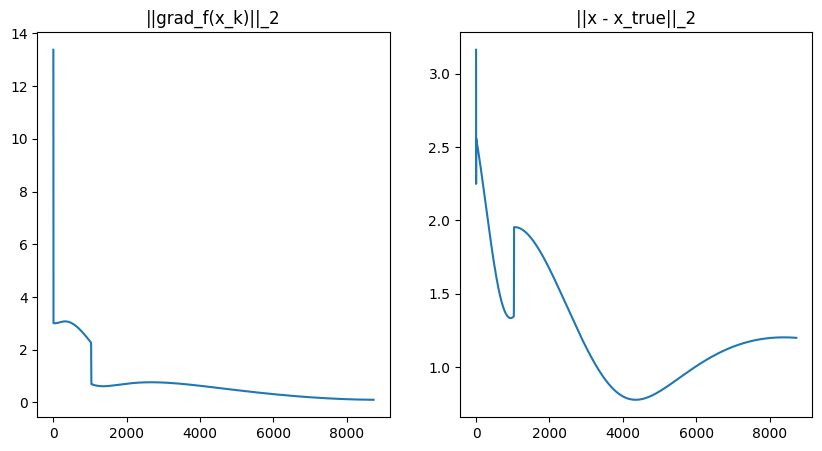

In [21]:
x_true = np.ones(n)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("||grad_f(x_k)||_2")
plt.plot(np.arange(0,i_comp+1), err_comp)
plt.subplot(1,2,2)
plt.title("||x - x_true||_2")
plt.plot(np.arange(0,i_comp+1), [np.linalg.norm(s-x_true,2) for s in x_comp])
plt.show()

### GD without backtracking method with alpha = 0.1

In [22]:
x_comp, i_comp,f_val_comp, grad_comp, err_comp = GD_WT(f,grad_f, x0, 1000, 1e-5, 1e-5, 1e-1)
print("x=",x_comp[-1])
print("K=",i_comp)
print("f(x)=",f_val_comp[-1])
print("grad_f(x)=",grad_comp[-1])
print("Error=",err_comp[-1])

x= [1.         1.00025067 0.99826867 0.99850808 1.00452771 1.01323774
 1.01032187 0.97815546 0.93768732 1.05882362]
K= 1000
f(x)= 1.9088586032910737e-07
grad_f(x)= [-4.44089210e-16  5.35909490e-06 -2.75845545e-05 -5.60337866e-05
 -5.67163314e-06  1.58728147e-04  3.19644912e-04  1.76353909e-04
 -4.14062892e-04 -2.18846674e-04]
Error= 0.0006178767843657947


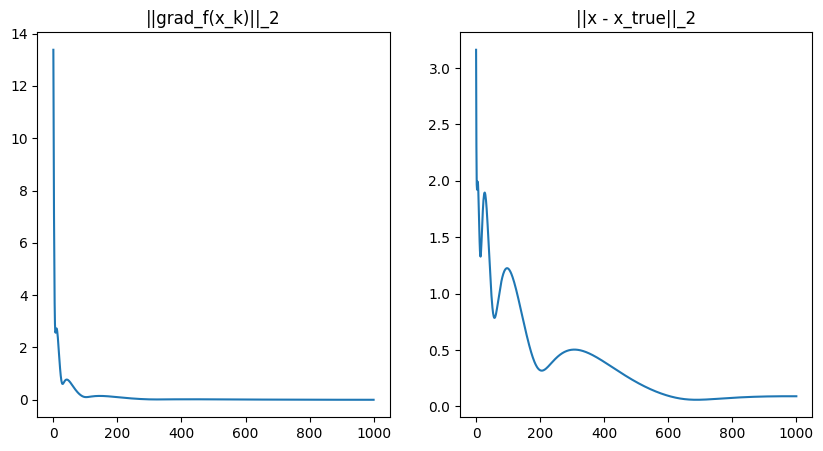

In [23]:
x_true = np.ones(n)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("||grad_f(x_k)||_2")
plt.plot(np.arange(0,i_comp+1), err_comp)
plt.subplot(1,2,2)
plt.title("||x - x_true||_2")
plt.plot(np.arange(0,i_comp+1), [np.linalg.norm(s-x_true,2) for s in x_comp])
plt.show()

### GD without backtracking method with alpha = 1

In [24]:
x_comp, i_comp,f_val_comp, grad_comp, err_comp = GD_WT(f,grad_f, x0, 1000, 1e-5, 1e-5, 1)
print("x=",x_comp[-1])
print("K=",i_comp)
print("f(x)=",f_val_comp[-1])
print("grad_f(x)=",grad_comp[-1])
print("Error=",err_comp[-1])

x= [1.         1.00002552 0.99975314 1.00020939 1.00097229 1.00049483
 0.99822336 0.99706948 1.00149463 1.00185251]
K= 278
f(x)= 8.710851351234346e-09
grad_f(x)= [ 0.00000000e+00  2.27916674e-07 -1.86324632e-06 -5.81934366e-07
  7.27852573e-06  1.54980186e-05  5.57615390e-06 -3.90869593e-05
 -8.06892129e-05  9.51579841e-05]
Error= 0.00013199129782856403


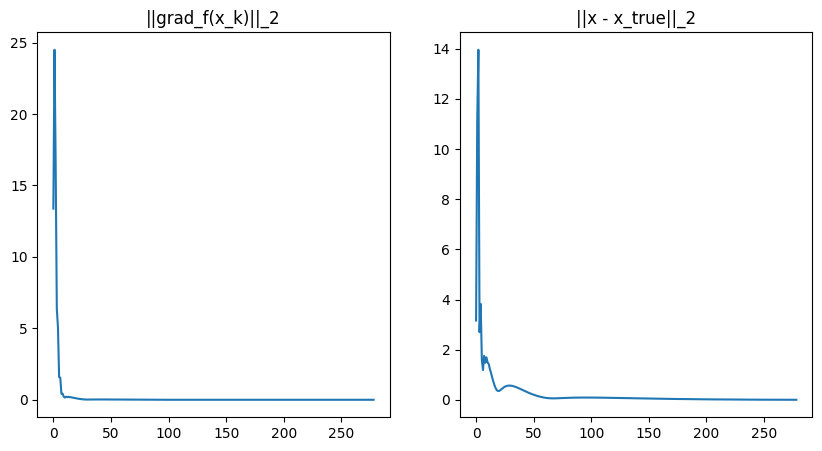

In [25]:
x_true = np.ones(n)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("||grad_f(x_k)||_2")
plt.plot(np.arange(0,i_comp+1), err_comp)
plt.subplot(1,2,2)
plt.title("||x - x_true||_2")
plt.plot(np.arange(0,i_comp+1), [np.linalg.norm(s-x_true,2) for s in x_comp])
plt.show()

### GD with backtracking method with kmax = 100

In [26]:
x_comp, i_comp,f_val_comp, grad_comp, err_comp = GD(f,grad_f, x0, 100, 1e-5, 1e-5)
print("x=",x_comp[-1])
print("K=",i_comp)
print("f(x)=",f_val_comp[-1])
print("grad_f(x)=",grad_comp[-1])
print("Error=",err_comp[-1])

x= [0.48886116 0.5480418  0.62322725 0.72150063 0.85392476 1.03724833
 1.29508251 1.65690268 2.15208343 2.79474172]
K= 100
f(x)= 4.546749398718236
grad_f(x)= [-0.51113884 -0.56641087 -0.63350999 -0.71464819 -0.80844407 -0.89930405
 -0.93037587 -0.74481853  0.02767046  2.17161427]
Error= 3.0155428694410022


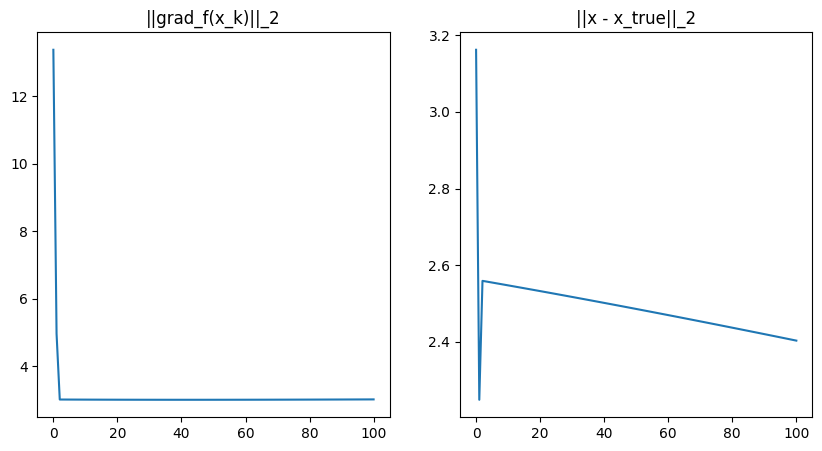

In [27]:
x_true = np.ones(n)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("||grad_f(x_k)||_2")
plt.plot(np.arange(0,i_comp+1), err_comp)
plt.subplot(1,2,2)
plt.title("||x - x_true||_2")
plt.plot(np.arange(0,i_comp+1), [np.linalg.norm(s-x_true,2) for s in x_comp])
plt.show()